# 1-Import

In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Projects/project_3/data/df_merged (1).csv")

In [3]:
# Data nın belirli bir kısmını alalım
df_1 = df.sample(frac =.20)

In [4]:
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10131646,2590,2020-10-18 13:20:04.8560,2020-10-18 14:03:15.3590,3744,1 Ave & E 5 St,40.725864,-73.986389,3571,Bedford Ave & Bergen St,40.676368,-73.952918,47532.0,Customer,1993.0,2.0
8972331,137,2020-10-02 22:00:40.1710,2020-10-02 22:02:57.6080,3578,Park Pl & Franklin Ave,40.674181,-73.956495,3571,Bedford Ave & Bergen St,40.676368,-73.952918,16443.0,Subscriber,1989.0,2.0
2407289,466,2020-07-09 10:56:03.1100,2020-07-09 11:03:49.6240,3507,Park Ave & E 124 St,40.804555,-73.939686,3920,E 132 St & Madison Ave,40.810224,-73.937195,38914.0,Subscriber,1964.0,2.0
8469374,1769,2020-09-26 17:57:06.8850,2020-09-26 18:26:36.5080,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,469,Broadway & W 53 St,40.763441,-73.982681,44196.0,Customer,1969.0,0.0
7242636,960,2020-09-12 15:25:35.5980,2020-09-12 15:41:35.9720,3905,4 Ave & E 12 St,40.732647,-73.990110,531,Forsyth St & Broome St,40.718939,-73.992663,45758.0,Subscriber,1978.0,1.0


In [5]:
df_1.shape

(2768510, 15)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768510 entries, 10131646 to 1117389
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   float64
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 338.0+ MB


In [7]:
df_1.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [8]:
df_1.dropna(axis=0, inplace=True)

In [9]:
# her sütun içindeki tekil (unique) veri adedini görelim

for col in df_1.columns:
    print(col, df_1[col].nunique())

tripduration 17637
starttime 2768172
stoptime 2768159
start station id 1195
start station name 1197
start station latitude 1209
start station longitude 1209
end station id 1216
end station name 1218
end station latitude 1232
end station longitude 1227
bikeid 23940
usertype 2
birth year 115
gender 3


# 2- Data Preprocessing

## 2.1 Converting Data Types

In [10]:
df_1['gender'] = df_1['gender'].astype(int)

In [11]:
df_1['starttime'] = pd.to_datetime(df_1['starttime'])
df_1['stoptime'] = pd.to_datetime(df_1['stoptime'])

In [12]:
#Ensure data is formatted correctly to avoid errors in the visuals
df_1['start station name'] = df_1['start station name'].astype('category')
df_1['end station name'] = df_1['end station name'].astype('category')
df_1['usertype'] = df_1['usertype'].astype('category')
df_1['gender'] = df_1['gender'].astype('category')

## 2.2 Change Time Second --->Minute 

In [13]:
# Let's extract new columns (day of the week, day of the month, hour, month, season, year etc.) by using new index.
df_1['Date'] = pd.to_datetime(df_1['starttime'])
df_1['Year'] = df_1['starttime'].dt.year
df_1['Month'] = df_1['starttime'].dt.month
df_1['Day'] = df_1['starttime'].dt.day
df_1.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Date,Year,Month,Day
10281249,2843,2020-10-20 13:54:46.609,2020-10-20 14:42:10.176,3416,7 Ave & Park Pl,40.677615,-73.973243,278,Concord St & Bridge St,40.697666,-73.984764,39333.0,Customer,1969.0,0,2020-10-20 13:54:46.609,2020,10,20
4207836,346,2020-08-03 20:05:51.339,2020-08-03 20:11:38.110,3148,E 84 St & 1 Ave,40.775655,-73.950686,3370,E 78 St & 2 Ave,40.772797,-73.955778,39254.0,Subscriber,1986.0,1,2020-08-03 20:05:51.339,2020,8,3
9763231,390,2020-10-13 11:53:57.042,2020-10-13 12:00:27.446,164,E 47 St & 2 Ave,40.753231,-73.970325,528,2 Ave & E 31 St,40.742909,-73.977061,27949.0,Subscriber,1969.0,1,2020-10-13 11:53:57.042,2020,10,13
13769388,261,2020-12-28 15:55:49.044,2020-12-28 16:00:10.981,251,Mott St & Prince St,40.723180,-73.994800,361,Allen St & Hester St,40.716059,-73.991908,47547.0,Subscriber,1990.0,1,2020-12-28 15:55:49.044,2020,12,28
1117389,1648,2020-06-19 18:48:16.427,2020-06-19 19:15:45.402,3256,Pier 40 - Hudson River Park,40.727714,-74.011296,3163,Central Park West & W 68 St,40.773407,-73.977825,33925.0,Subscriber,1990.0,1,2020-06-19 18:48:16.427,2020,6,19


# 3 EDA

AxesSubplot(0.125,0.125;0.775x0.755)


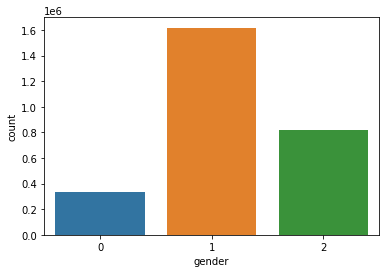

In [14]:
#gender distribution
# 0 = unknown 
# 1 = male 
# 2 = female
print(sns.countplot(x="gender", data=df_1));

In [15]:
# Kullanıcıların süreye göre toplam ne kadar süre kullanmış

df_1.groupby(['usertype'])['tripduration'].sum()

usertype
Customer      1592527824
Subscriber    2148738254
Name: tripduration, dtype: int64

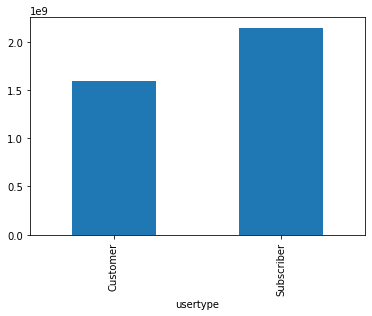

In [16]:
# Kullanıcıların süreye göre toplam ne kadar süre kullanmış göreselleştirme

df_1.groupby('usertype').tripduration.sum().plot.bar()

In [17]:
# Kullanıcı türeleri kaçartane
df_1.usertype.value_counts()

Subscriber    2056739
Customer       711771
Name: usertype, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


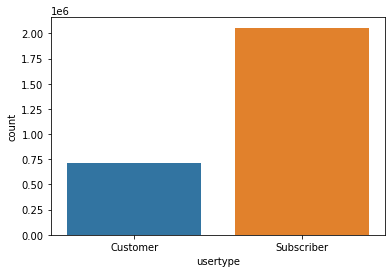

In [18]:
# Kullanıcı türeleri kaçartane görselleştirme
print(sns.countplot(x="usertype", data=df_1));

## 3.1 Top 10 Stations

In [19]:
#Data for Top 10 Stations visual
top10 = pd.DataFrame()
top10['Station']= df_1['start station name'].value_counts().head(10).index
top10['Number of Starts']= df_1['start station name'].value_counts().head(10).values
top10['Station'] = top10['Station'].cat.remove_unused_categories()
top10['Station'] = top10['Station'].astype('object')

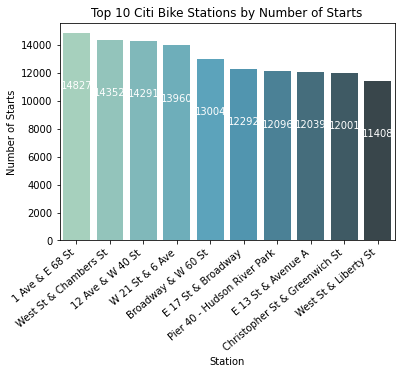

In [20]:
# Top 10 Stations
ax = sns.barplot('Station', 'Number of Starts', data = top10, palette="GnBu_d")
ax.set_title('Top 10 Citi Bike Stations by Number of Starts', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top10.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show();

## 3.2 Time and Usertype

In [21]:
# Converting Trip Duration in seconds to minutes
df_1['trip_length_minute'] = round(df_1['tripduration'] / 60,2)
df_1

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Date,Year,Month,Day,trip_length_minute
10131646,2590,2020-10-18 13:20:04.856,2020-10-18 14:03:15.359,3744,1 Ave & E 5 St,40.725864,-73.986389,3571,Bedford Ave & Bergen St,40.676368,-73.952918,47532.0,Customer,1993.0,2,2020-10-18 13:20:04.856,2020,10,18,43.17
8972331,137,2020-10-02 22:00:40.171,2020-10-02 22:02:57.608,3578,Park Pl & Franklin Ave,40.674181,-73.956495,3571,Bedford Ave & Bergen St,40.676368,-73.952918,16443.0,Subscriber,1989.0,2,2020-10-02 22:00:40.171,2020,10,2,2.28
2407289,466,2020-07-09 10:56:03.110,2020-07-09 11:03:49.624,3507,Park Ave & E 124 St,40.804555,-73.939686,3920,E 132 St & Madison Ave,40.810224,-73.937195,38914.0,Subscriber,1964.0,2,2020-07-09 10:56:03.110,2020,7,9,7.77
8469374,1769,2020-09-26 17:57:06.885,2020-09-26 18:26:36.508,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,469,Broadway & W 53 St,40.763441,-73.982681,44196.0,Customer,1969.0,0,2020-09-26 17:57:06.885,2020,9,26,29.48
7242636,960,2020-09-12 15:25:35.598,2020-09-12 15:41:35.972,3905,4 Ave & E 12 St,40.732647,-73.990110,531,Forsyth St & Broome St,40.718939,-73.992663,45758.0,Subscriber,1978.0,1,2020-09-12 15:25:35.598,2020,9,12,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281249,2843,2020-10-20 13:54:46.609,2020-10-20 14:42:10.176,3416,7 Ave & Park Pl,40.677615,-73.973243,278,Concord St & Bridge St,40.697666,-73.984764,39333.0,Customer,1969.0,0,2020-10-20 13:54:46.609,2020,10,20,47.38
4207836,346,2020-08-03 20:05:51.339,2020-08-03 20:11:38.110,3148,E 84 St & 1 Ave,40.775655,-73.950686,3370,E 78 St & 2 Ave,40.772797,-73.955778,39254.0,Subscriber,1986.0,1,2020-08-03 20:05:51.339,2020,8,3,5.77
9763231,390,2020-10-13 11:53:57.042,2020-10-13 12:00:27.446,164,E 47 St & 2 Ave,40.753231,-73.970325,528,2 Ave & E 31 St,40.742909,-73.977061,27949.0,Subscriber,1969.0,1,2020-10-13 11:53:57.042,2020,10,13,6.50
13769388,261,2020-12-28 15:55:49.044,2020-12-28 16:00:10.981,251,Mott St & Prince St,40.723180,-73.994800,361,Allen St & Hester St,40.716059,-73.991908,47547.0,Subscriber,1990.0,1,2020-12-28 15:55:49.044,2020,12,28,4.35


In [22]:
# rounding to nearest decimal and converting to int32 for easier computation
df_1['trip_length_minute'] = df_1['trip_length_minute'].round().astype('int32')

In [23]:
# Hafta içi hafta sonu ve başlangıç günü ve başlangıç saatlerini alalım

df_1['weekday']= df_1['starttime'].dt.weekday.astype('category')
df_1['weekend'] = [ d >=5 for d in df_1['weekday']]
df_1['starthour']= df_1['starttime'].dt.hour.astype('category')
df_1['startday']= df_1['starttime'].dt.day.astype('category')

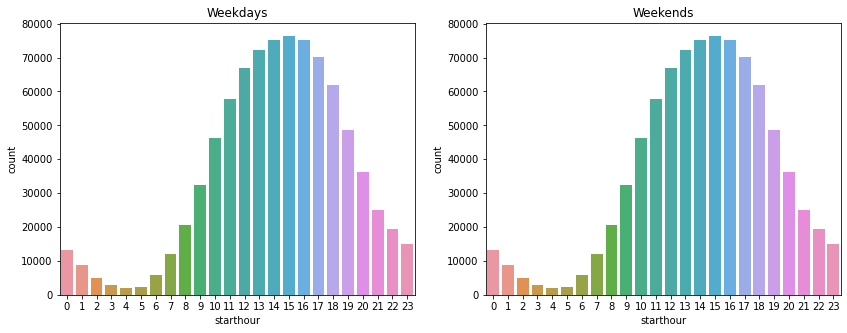

In [24]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=df_1[df_1['weekend']],x="starthour" , ax=ax[0]).set_title("Weekdays")
sns.countplot(data=df_1[df_1['weekend']],x="starthour" , ax=ax[1]).set_title("Weekends") ;

# 4 NEW DATA

In [25]:
df_1.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
Date                       0
Year                       0
Month                      0
Day                        0
trip_length_minute         0
weekday                    0
weekend                    0
starthour                  0
startday                   0
dtype: int64

In [26]:
# Creating a new dataframe ndf with selected (useful features)
df_2 = df_1[['trip_length_minute', 'starttime', 'stoptime',
       'start station name', 'end station name',
      'bikeid', 'usertype','birth year', 'gender', 'Month']]

df_1.loc[:,('birth year')] = df_1['birth year'].astype(int)
df_2.head()

,trip_length_minute,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,Month
10131646,43,2020-10-18 13:20:04.856,2020-10-18 14:03:15.359,1 Ave & E 5 St,Bedford Ave & Bergen St,47532.0,Customer,1993.0,2,10
8972331,2,2020-10-02 22:00:40.171,2020-10-02 22:02:57.608,Park Pl & Franklin Ave,Bedford Ave & Bergen St,16443.0,Subscriber,1989.0,2,10
2407289,8,2020-07-09 10:56:03.110,2020-07-09 11:03:49.624,Park Ave & E 124 St,E 132 St & Madison Ave,38914.0,Subscriber,1964.0,2,7
8469374,29,2020-09-26 17:57:06.885,2020-09-26 18:26:36.508,W 70 St & Amsterdam Ave,Broadway & W 53 St,44196.0,Customer,1969.0,0,9
7242636,16,2020-09-12 15:25:35.598,2020-09-12 15:41:35.972,4 Ave & E 12 St,Forsyth St & Broome St,45758.0,Subscriber,1978.0,1,9


## 4.1 Minute and Usertype

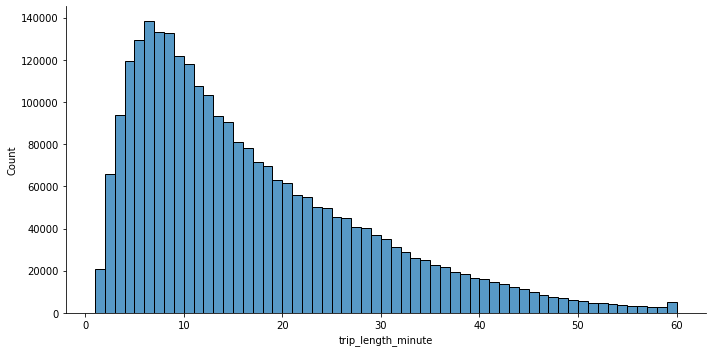

In [27]:
# Kaç dakika kullanılıyor
sns.displot(data=df_2,x="trip_length_minute", bins=range(1,61), aspect=10/5);

In [28]:
# Kullanıcı tipine göre ortlama kullanım süresi
avg_per_cust = pd.DataFrame()
avg_per_cust['Avg. Trip Duration'] = round(df_2.groupby('usertype')['trip_length_minute'].mean(),1)
avg_per_cust = avg_per_cust.reset_index()
avg_per_cust['usertype'] = avg_per_cust['usertype'].astype('object')

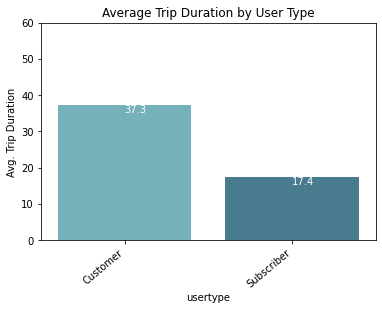

<Figure size 1080x432 with 0 Axes>

In [29]:
from matplotlib.ticker import MultipleLocator

#Average Trip Duration Based on Minutes
ax3 = sns.barplot('usertype', 'Avg. Trip Duration', data = avg_per_cust,palette="GnBu_d",errwidth=0)
ax3.set_title('Average Trip Duration by User Type')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha = 'right')
plt.ylim(0, 60)
plt.figure(figsize=(15,6))

for index, row in avg_per_cust.iterrows():
    ax3.text(row.name,row['Avg. Trip Duration']-1,(str(row['Avg. Trip Duration'])), 
             color='white', va='center_baseline', fontsize = 10)
plt.show();

## 4.2 TOP 10 TRİP

In [30]:
#Identify the 10 most popular trips
trips_df = pd.DataFrame()
trips_df = df_2.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Trip"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['start station name', "end station name"], axis = 1)
trips_df = trips_df.reset_index()
trips_df.head(10)

,index,Number of Trips,Trip
0,1410403,1713,West Drive & Prospect Park West to West Drive ...
1,26818,979,12 Ave & W 40 St to 12 Ave & W 40 St
2,376671,971,Central Park S & 6 Ave to Central Park S & 6 Ave
3,1120280,895,Roosevelt Island Tramway to Roosevelt Island T...
4,151155,844,5 Ave & E 73 St to 5 Ave & E 73 St
5,27979,838,12 Ave & W 40 St to West St & Chambers St
6,310845,828,Broadway & W 60 St to Broadway & W 60 St
7,153593,803,5 Ave & E 88 St to 5 Ave & E 88 St
8,375452,784,Central Park North & Adam Clayton Powell Blvd ...
9,319378,780,Brooklyn Bridge Park - Pier 2 to Brooklyn Brid...


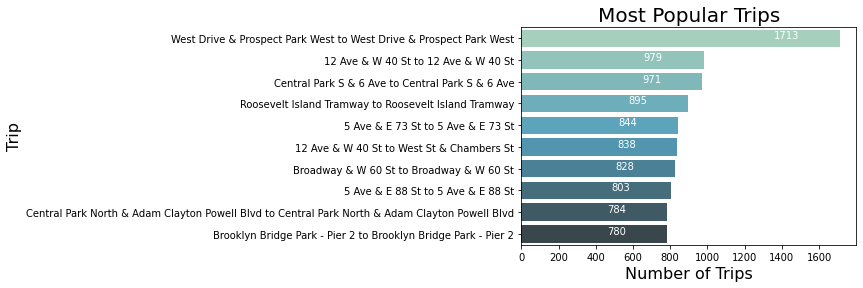

In [31]:
ax4 = sns.barplot('Number of Trips','Trip', data = trips_df,palette="GnBu_d")
ax4.set_title('Most Popular Trips', fontsize = 20)
ax4.set_ylabel("Trip",fontsize=16)
ax4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_df.iterrows():
    ax4.text(row['Number of Trips']- 220,index,row['Number of Trips'], 
             color='white', ha="right",fontsize = 10)
plt.show()

## 4.3 Outliers

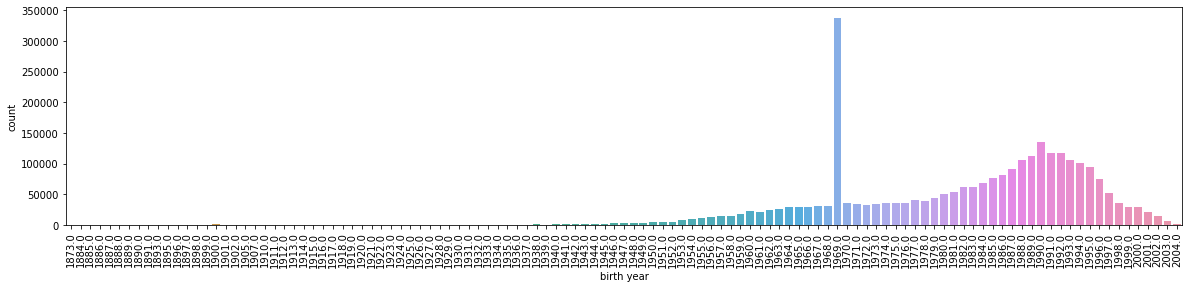

In [32]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.countplot(x="birth year",ax = ax, data=df_2)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

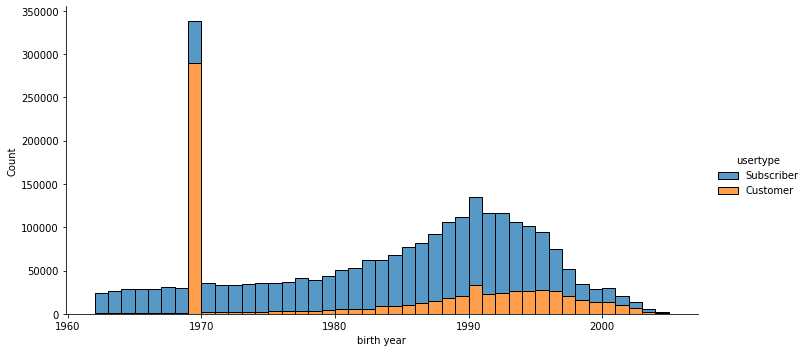

In [33]:
sns.displot(data=df_2,x="birth year", bins=range(1962,2006), 
            hue='usertype', multiple='stack' , hue_order=["Subscriber","Customer"], aspect=10/5); 

In [34]:
df_3 = df_2[(df_2['birth year'] != 1969) & (df_2['gender'] != 0)]
df_3 = df_3.reset_index(drop=True)
df_3

,trip_length_minute,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,Month
0,43,2020-10-18 13:20:04.856,2020-10-18 14:03:15.359,1 Ave & E 5 St,Bedford Ave & Bergen St,47532.0,Customer,1993.0,2,10
1,2,2020-10-02 22:00:40.171,2020-10-02 22:02:57.608,Park Pl & Franklin Ave,Bedford Ave & Bergen St,16443.0,Subscriber,1989.0,2,10
2,8,2020-07-09 10:56:03.110,2020-07-09 11:03:49.624,Park Ave & E 124 St,E 132 St & Madison Ave,38914.0,Subscriber,1964.0,2,7
3,16,2020-09-12 15:25:35.598,2020-09-12 15:41:35.972,4 Ave & E 12 St,Forsyth St & Broome St,45758.0,Subscriber,1978.0,1,9
4,4,2020-06-19 16:32:18.162,2020-06-19 16:36:31.108,31 Ave & 14 St,34 Ave & 13 St,41524.0,Subscriber,1982.0,2,6
...,...,...,...,...,...,...,...,...,...,...
2402650,5,2020-06-02 14:02:58.618,2020-06-02 14:07:36.823,E 43 St & 5 Ave,W 41 St & 8 Ave,38897.0,Customer,1985.0,1,6
2402651,4,2020-11-21 13:51:40.211,2020-11-21 13:55:14.591,Emerson Pl & Myrtle Ave,Washington Ave & Park Ave,30677.0,Subscriber,1985.0,2,11
2402652,6,2020-08-03 20:05:51.339,2020-08-03 20:11:38.110,E 84 St & 1 Ave,E 78 St & 2 Ave,39254.0,Subscriber,1986.0,1,8
2402653,4,2020-12-28 15:55:49.044,2020-12-28 16:00:10.981,Mott St & Prince St,Allen St & Hester St,47547.0,Subscriber,1990.0,1,12


# 5 DATA PREPROCESSING with New Data


In [35]:
#Usertype numerik yapma

Usertype = {"Subscriber": 1, "Customer": 2}
data = [df_3]

for dataset in data:
    dataset['usertype'] = dataset['usertype'].map(Usertype)

df_3

,trip_length_minute,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,Month
0,43,2020-10-18 13:20:04.856,2020-10-18 14:03:15.359,1 Ave & E 5 St,Bedford Ave & Bergen St,47532.0,2,1993.0,2,10
1,2,2020-10-02 22:00:40.171,2020-10-02 22:02:57.608,Park Pl & Franklin Ave,Bedford Ave & Bergen St,16443.0,1,1989.0,2,10
2,8,2020-07-09 10:56:03.110,2020-07-09 11:03:49.624,Park Ave & E 124 St,E 132 St & Madison Ave,38914.0,1,1964.0,2,7
3,16,2020-09-12 15:25:35.598,2020-09-12 15:41:35.972,4 Ave & E 12 St,Forsyth St & Broome St,45758.0,1,1978.0,1,9
4,4,2020-06-19 16:32:18.162,2020-06-19 16:36:31.108,31 Ave & 14 St,34 Ave & 13 St,41524.0,1,1982.0,2,6
...,...,...,...,...,...,...,...,...,...,...
2402650,5,2020-06-02 14:02:58.618,2020-06-02 14:07:36.823,E 43 St & 5 Ave,W 41 St & 8 Ave,38897.0,2,1985.0,1,6
2402651,4,2020-11-21 13:51:40.211,2020-11-21 13:55:14.591,Emerson Pl & Myrtle Ave,Washington Ave & Park Ave,30677.0,1,1985.0,2,11
2402652,6,2020-08-03 20:05:51.339,2020-08-03 20:11:38.110,E 84 St & 1 Ave,E 78 St & 2 Ave,39254.0,1,1986.0,1,8
2402653,4,2020-12-28 15:55:49.044,2020-12-28 16:00:10.981,Mott St & Prince St,Allen St & Hester St,47547.0,1,1990.0,1,12


In [36]:
# Drop etme

df_3 = df_3.drop(columns=['start station name','end station name','bikeid','starttime','stoptime'])
df_3

,trip_length_minute,usertype,birth year,gender,Month
0,43,2,1993.0,2,10
1,2,1,1989.0,2,10
2,8,1,1964.0,2,7
3,16,1,1978.0,1,9
4,4,1,1982.0,2,6
...,...,...,...,...,...
2402650,5,2,1985.0,1,6
2402651,4,1,1985.0,2,11
2402652,6,1,1986.0,1,8
2402653,4,1,1990.0,1,12


In [37]:
# Dogum tarihlerini gruplandırma

data = [df_3]
for dataset in data:
    dataset['birth year'] = dataset['birth year'].astype(int)
    dataset.loc[ dataset['birth year'] <= 1960, 'birth year'] = 0
    dataset.loc[(dataset['birth year'] > 1960) & (dataset['birth year'] <= 1968), 'birth year'] = 1
    dataset.loc[(dataset['birth year'] > 1968) & (dataset['birth year'] <= 1970), 'birth year'] = 2
    dataset.loc[(dataset['birth year'] > 1970) & (dataset['birth year'] <= 1980), 'birth year'] = 3
    dataset.loc[(dataset['birth year'] > 1980) & (dataset['birth year'] <= 1990), 'birth year'] = 4
    dataset.loc[(dataset['birth year'] > 1990) & (dataset['birth year'] <= 2000), 'birth year'] = 5
    dataset.loc[ dataset['birth year'] > 2000, 'birth year'] = 6
    
df_3

,trip_length_minute,usertype,birth year,gender,Month
0,43,2,5,2,10
1,2,1,4,2,10
2,8,1,1,2,7
3,16,1,3,1,9
4,4,1,4,2,6
...,...,...,...,...,...
2402650,5,2,4,1,6
2402651,4,1,4,2,11
2402652,6,1,4,1,8
2402653,4,1,4,1,12


In [38]:
# Dakikaları gruplandırma

data = [df_3]
for dataset in data:
    dataset['trip_length_minute'] = dataset['trip_length_minute'].astype(int)
    dataset.loc[ dataset['trip_length_minute'] <= 3, 'trip_length_minute'] = 0
    dataset.loc[(dataset['trip_length_minute'] > 3) & (dataset['trip_length_minute'] <= 4), 'trip_length_minute'] = 1
    dataset.loc[(dataset['trip_length_minute'] > 4) & (dataset['trip_length_minute'] <= 5), 'trip_length_minute'] = 2
    dataset.loc[(dataset['trip_length_minute'] > 5) & (dataset['trip_length_minute'] <= 6), 'trip_length_minute'] = 3
    dataset.loc[(dataset['trip_length_minute'] > 6) & (dataset['trip_length_minute'] <=9), 'trip_length_minute'] = 4
    dataset.loc[(dataset['trip_length_minute'] > 9) & (dataset['trip_length_minute'] <= 15), 'trip_length_minute'] = 5
    dataset.loc[(dataset['trip_length_minute'] > 15) & (dataset['trip_length_minute'] <= 30), 'trip_length_minute'] = 6
    dataset.loc[(dataset['trip_length_minute'] > 30) & (dataset['trip_length_minute'] <= 40), 'trip_length_minute'] = 7
    dataset.loc[ dataset['trip_length_minute'] > 40, 'trip_length_minute'] = 8
    
df_3

,trip_length_minute,usertype,birth year,gender,Month
0,8,2,5,2,10
1,0,1,4,2,10
2,4,1,1,2,7
3,6,1,3,1,9
4,1,1,4,2,6
...,...,...,...,...,...
2402650,2,2,4,1,6
2402651,1,1,4,2,11
2402652,3,1,4,1,8
2402653,1,1,4,1,12


In [39]:
df_3['usertype'] = df_3['usertype'].astype(int)

In [40]:
df_3['gender'] = df_3['gender'].astype(int)

In [41]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402655 entries, 0 to 2402654
Data columns (total 5 columns):
 #   Column              Dtype
---  ------              -----
 0   trip_length_minute  int64
 1   usertype            int64
 2   birth year          int64
 3   gender              int64
 4   Month               int64
dtypes: int64(5)
memory usage: 91.7 MB


In [42]:
df_3.usertype.value_counts()

1    1986596
2     416059
Name: usertype, dtype: int64

# 6 ML

In [43]:
y = df_3['usertype']

In [44]:
df_3.drop('usertype', axis=1, inplace=True)

## 6.1 Feature Scaling

In [45]:
df_3.describe()

,trip_length_minute,birth year,gender,Month
count,2.402655e+06,2.402655e+06,2.402655e+06,2.402655e+06
mean,4.690882e+00,3.645538e+00,1.336452e+00,8.785071e+00
std,2.081535e+00,1.501441e+00,4.724958e-01,1.819688e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
25%,4.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00
50%,5.000000e+00,4.000000e+00,1.000000e+00,9.000000e+00
75%,6.000000e+00,5.000000e+00,2.000000e+00,1.000000e+01
max,8.000000e+00,6.000000e+00,2.000000e+00,1.200000e+01


In [46]:
cols = df_3.columns

cols

Index(['trip_length_minute', 'birth year', 'gender', 'Month'], dtype='object')

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaler'ı train data üzerinde eğitelim ve 
# train datayı scale edelim
df_3 = scaler.fit_transform(df_3)

In [48]:
type(df_3)

numpy.ndarray

In [49]:
# datayı DataFrame yapalım tekrar

df_3 = pd.DataFrame(df_3, columns=[cols])

In [50]:
df_3.head()

,trip_length_minute,birth year,gender,Month
0,1.000,0.833333,1.0,0.666667
1,0.000,0.666667,1.0,0.666667
2,0.500,0.166667,1.0,0.166667
3,0.750,0.500000,0.0,0.500000
4,0.125,0.666667,1.0,0.000000


## 6.2 Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size=0.2, random_state=2)

In [56]:
X_train.shape

(1922262, 4)

In [57]:
X_test.shape

(480566, 4)

In [58]:
y_test

1162777    1
1261984    1
1293934    1
1965788    1
1614223    1
          ..
462682     1
1709222    1
26083      1
1316844    2
1716362    1
Name: usertype, Length: 480566, dtype: int64

## 6.3 Model Fit-Predict

In [53]:
#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [63]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest',  
              'Stochastic Gradient Decent'],
    'Score': [ acc_log, acc_random_forest, acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.99,Random Forest
82.91,Logistic Regression
82.69,Stochastic Gradient Decent


In [64]:
# classification report

print(classification_report(y_test, Y_prediction))

              precision    recall  f1-score   support

           1       0.83      0.99      0.91    397560
           2       0.58      0.06      0.10     83006

    accuracy                           0.83    480566
   macro avg       0.70      0.52      0.50    480566
weighted avg       0.79      0.83      0.77    480566



##6.4 Cross Validation

### Accuracy

In [54]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82988664 0.83011035 0.82972536 0.82941841 0.83010946 0.8297921
 0.83006264 0.82981812 0.82999501 0.82974528]
Mean: 0.8298663355353751
Standard Deviation: 0.00020424513459510333


### Recall

In [55]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "recall")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99142417 0.99173876 0.99169472 0.99196527 0.99192123 0.99158146
 0.99206594 0.99162545 0.99168208 0.99214768]
Mean: 0.9917846764118792
Standard Deviation: 0.00021897089475448475


### Precision

In [56]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "precision")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83411143 0.83408468 0.83383592 0.83344524 0.83403519 0.83395863
 0.83391423 0.83395332 0.83405917 0.83360735]
Mean: 0.8339005151163625
Standard Deviation: 0.00020626749041183543


## 6.5 Confusion Matrix

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[1576198,   13149],
       [ 313892,   18885]])

In [61]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8339274849345798
Recall: 0.9917267909399269


In [62]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.9060074948906964

##6.6 Comparing Precision-Recall curves

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

In [73]:
from sklearn.metrics import auc, precision_recall_curve

baseline_model = sum(y_test == 1) / len(y_test)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr,pos_label=1)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt,pos_label=1)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf,pos_label=1)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test, probs_xg,pos_label=1)
auc_xg = auc(recall_xg, precision_xg)

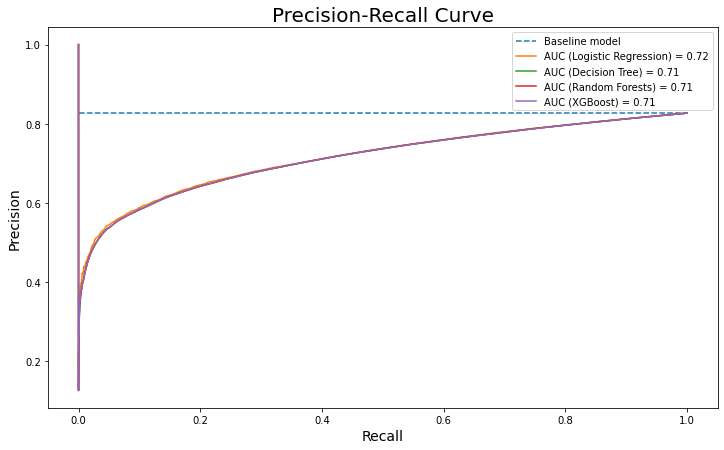

In [74]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();